In [192]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


# Other Libraries
#from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")


## General Steps
 1. Exploratory Data Analysis
 1. Data Pre-processing
   1. Cleanup and Transform the Data
   1. Encode the Data
   1. Scaling/Resampling etc
 1. Feature Selection
 1. Split Training and Test Sets
 1. Fine Tune Algorithms
 1. Cross Validate
 
### Data Analysis

In [169]:
# Load dataset
df = pd.read_csv("fraud_prep.csv")

In [170]:
# EDA
print(df.shape)

# First 5 features
print(df.head())

# Dataset features
print(df.info())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128

In [4]:
# summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# count the occurrences of fraud and no fraud cases
print("Class types: 0 non-fraud, 1 fraud")
print(df["Class"].value_counts())

# Normalize target for training
print("Ratio of class types: 0 non-fraud, 1 fraud")
print(df["Class"].value_counts(normalize=True))

Class types: 0 non-fraud, 1 fraud
0    284315
1       492
Name: Class, dtype: int64
Ratio of class types: 0 non-fraud, 1 fraud
0    0.998273
1    0.001727
Name: Class, dtype: float64


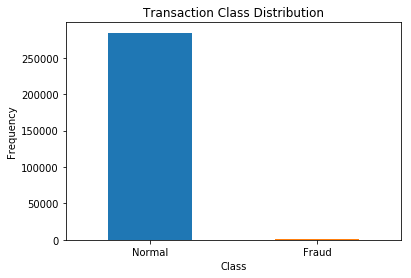

In [173]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), ('Normal','Fraud'))

plt.xlabel("Class")

plt.ylabel("Frequency");

In [176]:
Fraud = df[df['Class']==1]

Normal = df[df['Class']==0]

In [180]:
# Check if amount is relevant to identify normal/fraud transaction

Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [178]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

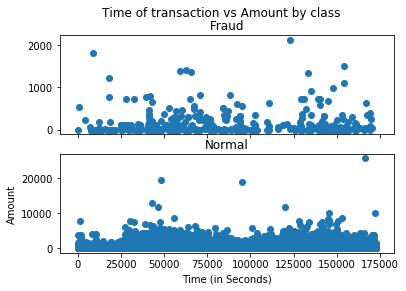

In [182]:
# Check if time is relevant to identify normal/fraud transaction

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

#### Conclusion: 
It is likely that fraud transaction has higher amount than normal transaction. Similarly, we can analyze other features, such as Time, which does not show any correlation with normal/fraud transaction.

### Feature Analysis

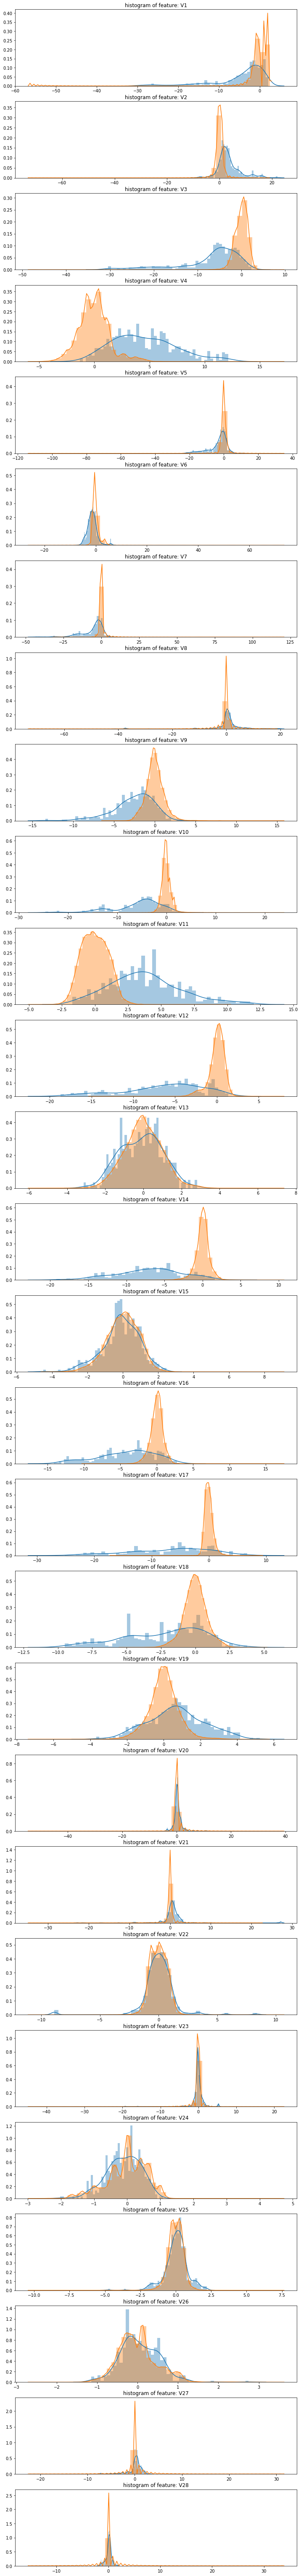

In [193]:
#Select only the anonymized features.
v_features = df.ix[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

#### Conclusion:
From the charts above, we can remove features that have similar distribution between fraud and non-fraud classes. For example, features 'V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8' have similar distribution between fraud and non-fraud. We can build a new dataset after dropping these features.

With feature selection, we can train the new datset with less features, then compare with the performance of the model trained with the full dataset.

In our following model training, however, we use the full dataset and features. 

In [188]:
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier ratio: ", outlier_fraction)

print('Fraud : {}'.format(len(df[df['Class'] == 1])))
print('Non-Fraud: {}'.format(len(df[df['Class'] == 0])))

Outlier ratio:  0.0017304750013189597
Fraud : 492
Non-Fraud: 284315


#### Dataset SUMMARY: very in-balanced classes, i.e., many non-fraud and a few fraud classes.

## Overview of fraud transaction analysis
In banking or credit payment industry, the standard way is to use statistical approach to identify an "optimal" statistics threshold to separate fraud transactions and non-fraud transactions. 

A common used approach to find such threhold is to find the mean of the sample transactions.  Alternatively, we can use other statistics metrics, such as mean, mode, quintitle.

In [7]:
# Find the mean of features for each class group
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
# Now use V1 < -3 and V2 > 2 as threshold to identify the fraud transactions
df['fraud_flagged'] = np.where(np.logical_and(df['V1']<-3, df['V2']>2), 1,0)
ct=pd.crosstab(df.Class, df.fraud_flagged, rownames=["Fraud_actual"], colnames=["Fraud_flagged"])

print("**** Fraud_actual vs Fraud_flagged ****")
print(ct)

print("**** Fraud_actual vs Fraud_flagged (%) ****")
print(ct.apply(lambda r: r/r.sum()*100, axis=1))

**** Fraud_actual vs Fraud_flagged ****
Fraud_flagged       0     1
Fraud_actual               
0              278946  5369
1                 316   176
**** Fraud_actual vs Fraud_flagged (%) ****
Fraud_flagged          0          1
Fraud_actual                       
0              98.111602   1.888398
1              64.227642  35.772358


#### SUMMARY: 35.77% fraud transactions are identified, however, 64.22% are not identified. 1.88% non-fraud transactions are flagged as fraud.

An even better approach to use the mean statistics is to use moving averages instead of simple averages, which would smooth short-term fluctuations and highlight the long term one


## Supervised Learning
### Data pre-processing

In [9]:
# Load dataset
df = pd.read_csv("fraud_prep.csv")

# Drop columns/features
X = df.drop(["Time", "Class", "fraud_flagged"], axis=1)
y = df["Class"]

# Create training and test sets using random split
# Note that, we can also use CV, shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Logistic Regression

In [45]:
# Training model
LR_clf = LogisticRegression(solver="liblinear")
LR_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Get prediction on test set
prediction  = LR_clf.predict(X_test)
proba       = LR_clf.predict_proba(X_test)

In [47]:
print("Accuracy score: ", accuracy_score(y_test,prediction))
# Print ROC and Confusion Matrix
# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, proba[:,1])))

print("Stats report:\n{}\n".format(classification_report(y_test, prediction)))

# print confusion matrix
cfm = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Confusion matrix:\n{}\n".format(cfm))

Accuracy score:  0.999283727985169
ROC score: 0.9741287058139425

Stats report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.67      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202


Confusion matrix:
[[71071    11]
 [   40    80]]



* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

* The support is the number of occurrences of each class in y_true.

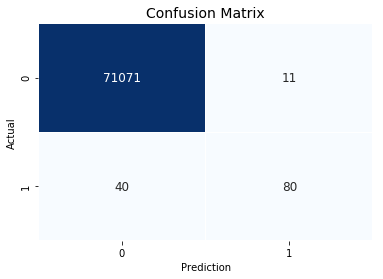

In [13]:
#plot the confusion matrix
sns.heatmap(cfm, annot=True, annot_kws={"size":12}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion Matrix", fontsize=14)
plt.ylabel("Actual", fontsize=10)
plt.xlabel("Prediction", fontsize=10)
plt.show()

#### Summary: 40 false negatives, 11 false positives, 80 out of 120 (67%)  fraud are flagged. 

### Data Resampling
As shown above, the dataset is highly inbalanced. With a more balanced dataset, let us test if we can improve the performance.

We can either undersampling non-fraud cases (losing data) or oversampling fraud cases (duplicates). 

SMOTE (oversampling method) is used to create synthetic data. Instead of copying duplicated data, SMOTE uses nearest neighbor characteristics to create synthetic fraud cases. SMOTE works well when the fraud cases nearest neighbors show distinct characteristics. 

In [14]:
# Define the resampling method
resample_method = SMOTE()
X_resampled, y_resampled = resample_method.fit_sample(X_train, y_train)

# check before and after resample
print("Before resampling:\n{}\n".format(y_train.value_counts()))
print("After resampling:\n{}\n".format(pd.Series(y_resampled).value_counts()))

Before resampling:
0    213233
1       372
Name: Class, dtype: int64

After resampling:
1    213233
0    213233
dtype: int64



### Train model with resampled dataset

In [15]:
# Training model
LR_clf = LogisticRegression(solver="liblinear")
LR_clf.fit(X_resampled, y_resampled)

# Get prediction on test set
prediction  = clf.predict(X_test)
prob       = clf.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y_test,prediction))

# Print ROC and Confusion Matrix
# print the ROC score
print("ROC score (resampled): {}\n".format(roc_auc_score(y_test, prob[:,1])))

print("Stats report (resampled):\n{}\n".format(classification_report(y_test, prediction)))

# print confusion matrix
cfm = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Confusion matrix (resampled):\n{}\n".format(cfm))

Accuracy score:  0.9830763180809527
ROC score (resampled): 0.9763196027123604

Stats report (resampled):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.08      0.89      0.15       120

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.57     71202
weighted avg       1.00      0.98      0.99     71202


Confusion matrix (resampled):
[[69890  1192]
 [   13   107]]



#### SUMMARY: 106 out of 120 fraud transactions are flagged. However, we have an increase false positive 11 -> 1190, meaning more non-fraud transactions flagged as fraud. This is likely because the fraud case scattered over the dataset and introduced some noise, i.e., nearest neighbors not necessarily are fraud transactions.

### Random Forest

# ADD COMMENTS
Random forest has a built-in mode to deal with inbalanced dataset. The balanced* mode adjusts weights inversely proportional to the class frequence in the input data as num_samples/(np.bincount(y) * num_classes)

The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). 

### Train Random Forest with normal dataset

In [16]:
%%time
# define the model as the random forest
RF_clf = RandomForestClassifier(class_weight="balanced_subsample", random_state=0)

# fit the model to our training set
RF_clf.fit(X_train, y_train)

# obtain predictions from the test data 
prediction = RF_clf.predict(X_test)

# predict probabilities
prob = RF_clf.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, prediction)))
print("ROC score = {}\n".format(roc_auc_score(y_test, prob[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, prediction)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, prediction)))

Accuracy Score: 0.9995084407741356

ROC score = 0.9206149822270993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.95      0.75      0.84       120

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202


Confusion Matrix:
[[71077     5]
 [   30    90]]

CPU times: user 9.55 s, sys: 126 ms, total: 9.67 s
Wall time: 9.78 s


### Train Random Forest with Resampled dataset

In [42]:
%%time
# Training model
# The "balanced" mode uses the values of y to automatically adjust weights 
# inversely proportional to class frequencies in the input data as 
# n_samples / (n_classes * np.bincount(y)).
RF_clf = RandomForestClassifier(class_weight="balanced_subsample", random_state=0)
RF_clf.fit(X_resampled, y_resampled)

# Get prediction on test set
prediction  = RF_clf.predict(X_test)
prob       = RF_clf.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y_test,prediction))

# Print ROC and Confusion Matrix
# print the ROC score
print("ROC score (resampled): {}\n".format(roc_auc_score(y_test, prob[:,1])))

print("Stats report (resampled):\n{}\n".format(classification_report(y_test, prediction)))

# print confusion matrix
cfm = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Confusion matrix (resampled):\n{}\n".format(cfm))

Accuracy score:  0.9995505744220669
ROC score (resampled): 0.9523132907534021

Stats report (resampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.89      0.84      0.86       120

    accuracy                           1.00     71202
   macro avg       0.94      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202


Confusion matrix (resampled):
[[71069    13]
 [   19   101]]

CPU times: user 32.3 s, sys: 361 ms, total: 32.6 s
Wall time: 29.9 s


#### SUMMARY:  for resampled dataset, RandomeForest shows similar true positives to LogisticRegression102 (RF) vs 120(LR). RandomForest  does not misclassify as many as non-fraud cases as fraud 16 (RF) vs 1190 (LR)

### GridSearchCV for optimal parameters
For the classifier parameters, so far default values are mostly applied. We can manually set which scores carry more importance using GridSearchCV to find the optimal params. For fraud detection, we would rather prefer a better recall score (i.e., detect as many as fraud cases at cost of misclassifying non-fraud to fraud). We can also ajust F-score to reduce false positives (i.e., improved precision). 

Goal is to find optimal recall-precision balance.

In [ ]:
%%time

# Define the parameter sets to test
param_grid = {"n_estimators": [10, 50], 
              "max_features": ["auto", "log2"],  
#               "min_samples_leaf": [1, 10],
              "max_depth": [4, 8], 
              "criterion": ["gini", "entropy"], 
              "class_weight": [None, {0:1, 1:12}]
}

# define the model to use
model = RandomForestClassifier(random_state=0)

# combine the parameter sets with the defined model
grid_obj = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="recall", n_jobs=-1)

# fit the model to our training data and obtain best parameters
grid_obj.fit(X_train, y_train)

In [ ]:
%%time

clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)



In [ ]:
predictions = clf.predict(X_test)

# predict probabilities
probs = CV_model.predict_proba(X_test)

print(accuracy_score(y_test, predictions))

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predictions)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predictions)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predictions)))

### Decision Tree
Decision tree tends to overfit on data with large number of features. We can apply feature selection or PCA/ICA beforehand to find discriminative features

In [49]:
# Balanced mode used
DT_clf = DecisionTreeClassifier()
print(clf.get_params)

# fit the model to our training data
DT_clf.fit(X_train, y_train)

# obtain predictions from the test data 
predictions = DT_clf.predict(X_test)

# predict probabilities
prob = DT_clf.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predictions)))
print("ROC score = {}\n".format(roc_auc_score(y_test, prob[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predictions)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predictions)))

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>
Accuracy Score: 0.9992415943372377

ROC score = 0.8831504459638164

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.78      0.77      0.77       120

    accuracy                           1.00     71202
   macro avg       0.89      0.88      0.89     71202
weighted avg       1.00      1.00      1.00     71202


Confusion Matrix:
[[71056    26]
 [   28    92]]



In [50]:
# Balanced mode used
DT_clf = DecisionTreeClassifier(class_weight="balanced")
print(clf.get_params)

# fit the model to our training data
DT_clf.fit(X_resampled, y_resampled)

# obtain predictions from the test data 
predictions = DT_clf.predict(X_test)

# predict probabilities
prob = DT_clf.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score (resampled): {}\n".format(accuracy_score(y_test, predictions)))
print("ROC score = {}\n".format(roc_auc_score(y_test, prob[:,1])))
print("Classification Report (resampled):\n{}\n".format(classification_report(y_test, predictions)))
print("Confusion Matrix (resampled):\n{}\n".format(confusion_matrix(y_test, predictions)))

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>
Accuracy Score (resampled): 0.997514114772057

ROC score = 0.8989237781716891

Classification Report (resampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.39      0.80      0.52       120

    accuracy                           1.00     71202
   macro avg       0.69      0.90      0.76     71202
weighted avg       1.00      1.00      1.00     71202


Confusion Matrix (resampled):
[[70929   153]
 [   24    96]]



#### SUMMARY: similar to previous classifier, resampled dataset flagged more fraud case correctly (98 vs 78) with increased recall (147 false positives vs 28). 

### Voting Classifier
Even when some models (RF) shows overall better performance, we can still combine features of other models to improve the results. The answer is ensemble model.

In [52]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=0, solver="lbfgs")
clf2 = RandomForestClassifier(class_weight={0:1,1:12}, criterion='entropy', n_estimators=50, max_features='log2', max_depth=4, n_jobs=-1, random_state=0)
clf3 = DecisionTreeClassifier(random_state=0, class_weight="balanced")


In [54]:
%%time
# combine the classifiers in the ensemble model
ensemble_clf = VotingClassifier(estimators=[("lr", clf1), ("rf", clf2), ("dt", clf3)], voting="soft")

ensemble_clf.fit(X_train, y_train)
predicted = ensemble_clf.predict(X_test)
proba = ensemble_clf.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
# print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9994382180275835

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.87      0.78      0.82       120

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202


Confusion Matrix:
[[71068    14]
 [   26    94]]

CPU times: user 10.1 s, sys: 151 ms, total: 10.3 s
Wall time: 18.1 s


In [34]:
# Ensemble model allows ajustment of the individual model weights to give 
# more preference to the output of that model.
# From LR, DT, RF status, we can see that RF and DT gives better TP and RF gives lowest FP
# Therefore, we will give a bit more weights for RF classifier

ensemble_model = VotingClassifier(estimators=[("LR", clf1), ("RF", clf2), ("DT", clf3)], voting="soft", weights=[1,6,3], flatten_transform=True)

ensemble_model.fit(X_train, y_train)
predicted = ensemble_model.predict(X_test)
probs = ensemble_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9994803516755147

ROC score = 0.9748641240632884

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.90      0.78      0.84       120

    accuracy                           1.00     71202
   macro avg       0.95      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202


Confusion Matrix:
[[71071    11]
 [   26    94]]



#### SUMMARY Compared with LR, RF, DT each alone, Voting Classifier shows best precision to flag fraud cases and a modest recall. 

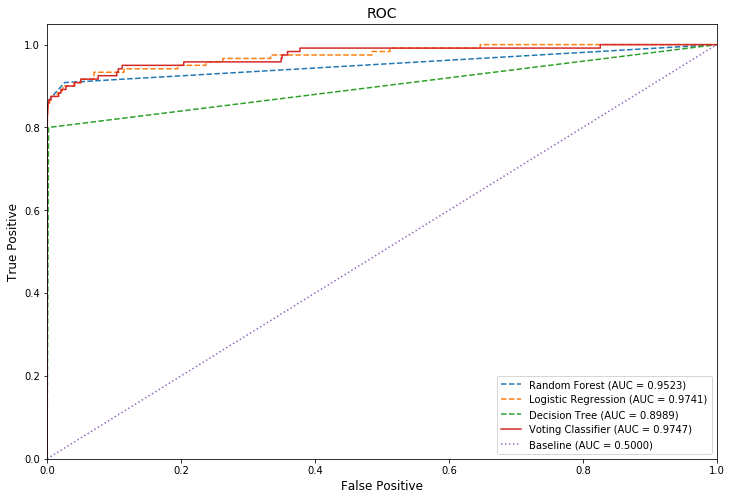

In [140]:
# Plot
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, RF_clf.predict_proba(X_test)[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, LR_clf.predict_proba(X_test)[:,1])
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, DT_clf.predict_proba(X_test)[:,1])
ensemble_fpr, ensemble_tpr, ensemble_thresholds = roc_curve(y_test, ensemble_clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))

# plot Random Forest ROC
plt.plot(fpr, tpr, label="Random Forest (AUC = {:1.4f})".format(roc_auc_score(y_test, RF_clf.predict_proba(X_test)[:,1])), linestyle="--")
# plot Linear Regression ROC
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (AUC = {:1.4f})".format(roc_auc_score(y_test, LR_clf.predict_proba(X_test)[:,1])), linestyle="--")
# plot Decision Tree ROC
plt.plot(tree_fpr, tree_tpr, label="Decision Tree (AUC = {:1.4f})".format(roc_auc_score(y_test, DT_clf.predict_proba(X_test)[:,1])), linestyle="--")
# plot Voting Classifier ROC
plt.plot(ensemble_fpr, ensemble_tpr, label="Voting Classifier (AUC = {:1.4f})".format(roc_auc_score(y_test, ensemble_clf.predict_proba(X_test)[:,1])), linestyle="-")
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle=":")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive", fontsize=12)
plt.ylabel("True Positive", fontsize=12)
plt.title("ROC", fontsize=14)
plt.legend(loc="lower right")
#plt.savefig("roc.png", bbox_inches="tight")
plt.show()

## Unsupervised Machine Learning
For unsupervised machine learning, we deal with un-labeld dataset to flag normal pattern and anormaly pattern. K-means will be used for clustering. 

### Data Analysis
For distance-metrics based algortithm, we need to scale the data first as features with different scale will affect the algo. 

In [166]:
# Load dataset
df = pd.read_csv("fraud_prep.csv")

X = np.array(df.drop(["Time", "Class"], axis=1)).astype(np.float)
y = df["Class"].values

In [130]:
from sklearn.preprocessing import MinMaxScaler

# Scale data to (0,1), default feature_range=(0, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
# default: n_clusters=8, init='k-means++', max_iter=100, batch_size=100,
kmeans = MiniBatchKMeans(random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

#### Notes: as we can see from the above, the default number of clusters for K-means is 8. We can fine tune to find the optimal number of clusters using the elbow curve.

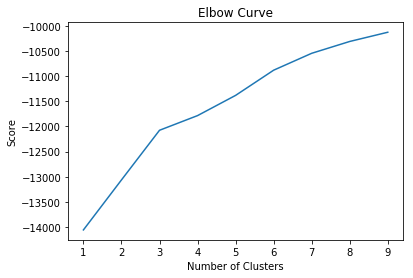

In [145]:
# define the range of clusters to try
clustno = range(1, 10)

# run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# plot the models and their respective score 
plt.plot(clustno , score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Notes: from the elbow curve, we can see the cluster number can be centered around either 3 or 6. 
*Cluster number with both 3 and 6 were tested and the result differences were NOT significant.

In [163]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# define K-means model 
kmeans = MiniBatchKMeans(n_clusters=6, random_state=42).fit(X_train)

# obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)

# save the cluster centroids
X_test_clusters_centers = kmeans.cluster_centers_

# calculate the distance to the cluster centroids for each point
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# create fraud predictions based on outliers on clusters 
# define the boundary between fraud and non fraud to be at 95% of distance distribution and higher
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

Accuracy Score: 0.9512657561181138

ROC score = 0.9110764100237732



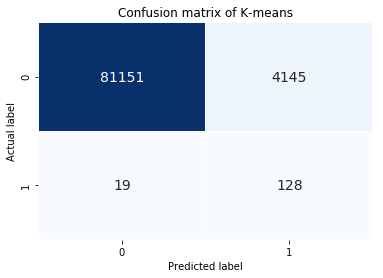

In [164]:
# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, km_y_pred)))
print("ROC score = {}\n".format(roc_auc_score(y_test, km_y_pred)))

# create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# plot the confusion matrix in a figure to visualize results 
sns.heatmap(km_cm, annot=True, annot_kws={"size":14}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of K-means", fontsize=12)
plt.ylabel("Actual label", fontsize=10)
plt.xlabel("Predicted label", fontsize=10)

plt.show()

#### SUMMARY: 
As shown in the results, we can see K-means was able to identify 127 TP.
The false positive is very large (4145) compared with supervised learning. This can be improved by changing 